In [46]:
import pandas as pd
from constants import *
import pylab
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [6]:
IDEOTYPES = {'T' : 'blue',
             'dT' : 'red',
             'C' : 'green',
             'B' : 'yellow'}
CONDITIONS = {'S' : 'Yellow', 'C': 'Blue'}

In [93]:
best_of_best_df = pd.read_csv('%s/best_of_best.csv' % RESULTS_DIR, skipinitialspace=True)
best_of_best_df

,arbor name,optimal G,optimal alpha,optimal pt distance
0,043_5_S_day5,-0.2714,0.6500,0.000036
1,091_4_S_day5,0.1887,0.2887,5.835172
2,022_5_C_day5,-0.0286,0.5214,5.382678
3,220_1_C_day5,-0.1827,0.3613,4.710622
4,237_2_C_day5,-0.1060,0.8000,4.180751
...,...,...,...,...
1533,044_5_C_day5,0.1173,0.5786,30.536512
1534,008_4_S_day5,0.0286,0.6173,6.447029
1535,M058_1_S_1aba_day9,1.9060,0.1327,0.375290
1536,M248_2_C_nocyto_day9,0.0714,0.7613,9.336840


In [94]:
ideotypes_df = pd.read_csv('%s/manual_scoring_last_day.csv' % SCORING_DATA_DIR, skipinitialspace=True)
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('CT', 'C')
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('DT', 'dT')
to_drop = ['?', 'M', 'no idea', 'T/B']
ideotypes_df = ideotypes_df[~ideotypes_df['ideotype (T/C/B)'].isin(to_drop)]
ideotypes_df.dropna(subset=['ideotype (T/C/B)'], inplace=True)
ideotypes_df

,experiment,Picture #,genotype,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra
0,PimpiBig4,233,1,C,C,L,NaN,LR up
1,PimpiBig4,281,1,C,T,M,NaN,NaN
2,PimpiBig4,287,1,C,T,M,NaN,NaN
3,PimpiBig4,246,2,S,C,L,IR,NaN
4,PimpiBig4,263,3,C,dT,L,NaN,NaN
...,...,...,...,...,...,...,...,...
1443,PimpiBig1,126,308,C,dT,M,NaN,NaN
1444,PimpiBig1,144,308,C,C,M,NaN,NaN
1445,PimpiBig1,87,308,S,C,S,Y,NaN
1446,PimpiBig1,131,308,S,C,M,D,NaN


In [95]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df

,experiment,arbor name,day,Picture #,genotype,replicate,condition,hormone
0,PimpiBig4,103_4_S_day5,5,297,103,4,S,NaN
1,PimpiBig4,031_3_S_day5,5,278,031,3,S,NaN
2,PimpiBig4,055_2_S_day5,5,151,055,2,S,NaN
3,PimpiBig4,098_1_S_day5,5,14,098,1,S,NaN
4,PimpiBig4,101_1_S_day5,5,106,101,1,S,NaN
...,...,...,...,...,...,...,...,...
9790,PimpiBig6,053_1_C_day5,5,226,053,1,C,NaN
9791,PimpiBig6,045_2_C_day5,5,227,045,2,C,NaN
9792,PimpiBig6,045_3_S_day5,5,228,045,3,S,NaN
9793,PimpiBig6,053_2_S_day5,5,229,053,2,S,NaN


In [96]:
arbor_stats_df = pd.merge(best_of_best_df, metadata_df, on = 'arbor name')
arbor_stats_df['condition'] = arbor_stats_df['condition'].replace('s', 'S')
arbor_stats_df

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
0,043_5_S_day5,-0.2714,0.6500,0.000036,PimpiBig6,5,24,043,5,S,NaN
1,091_4_S_day5,0.1887,0.2887,5.835172,PimpiBig3,5,54,091,4,S,NaN
2,022_5_C_day5,-0.0286,0.5214,5.382678,PimpiBig6,5,81,022,5,C,NaN
3,220_1_C_day5,-0.1827,0.3613,4.710622,PimpiBig1,5,60,220,1,C,NaN
4,237_2_C_day5,-0.1060,0.8000,4.180751,PimpiBig3,5,290,237,2,C,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1581,044_5_C_day5,0.1173,0.5786,30.536512,PimpiBig6,5,146,044,5,C,NaN
1582,008_4_S_day5,0.0286,0.6173,6.447029,PimpiBig4,5,105,008,4,S,NaN
1583,M058_1_S_1aba_day9,1.9060,0.1327,0.375290,PimpiABA,9,50,M058,1,S,1aba
1584,M248_2_C_nocyto_day9,0.0714,0.7613,9.336840,PimpiCyto,9,105,M248,2,C,nocyto


In [97]:
arbor_stats_df['genotype'] = arbor_stats_df['genotype'].astype(str)
ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)

In [98]:
ideotypes_df = pd.merge(ideotypes_df, arbor_stats_df, on = ['experiment', 'genotype','condition', 'Picture #'])
ideotypes_df

,experiment,Picture #,genotype,condition,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,arbor name,optimal G,optimal alpha,optimal pt distance,day,replicate,hormone
0,PimpiBig4,311,101,C,B,L,NaN,NaN,101_2_C_day5,0.0000,0.1500,2933.487412,5,2,NaN
1,PimpiBig4,334,101,C,B,M,NaN,NaN,101_3_C_day5,0.7173,0.0000,282.067986,5,3,NaN
2,PimpiBig4,224,101,S,B,L,L,NaN,101_3_S_day5,0.3173,0.1327,364.508868,5,3,NaN
3,PimpiBig4,237,102,S,T,L,D,NaN,102_1_S_day5,0.0714,0.8500,2.260324,5,1,NaN
4,PimpiBig4,298,102,S,dT,M,D,NaN,102_3_S_day5,0.0000,0.8500,0.401497,5,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,PimpiBig1,126,308,C,dT,M,NaN,NaN,308_1_C_day5,0.1060,0.5827,7.742201,5,1,NaN
613,PimpiBig1,144,308,C,C,M,NaN,NaN,308_2_C_day5,0.0060,0.7214,5.743682,5,2,NaN
614,PimpiBig1,87,308,S,C,S,Y,NaN,308_1_S_day5,-0.0714,1.0000,0.002620,5,1,NaN
615,PimpiBig1,131,308,S,C,M,D,NaN,308_2_S_day5,0.0714,0.6786,0.623465,5,2,NaN


In [99]:
print(ideotypes_df['ideotype (T/C/B)'].value_counts())

ideotype (T/C/B)
dT    274
T     169
C     114
B      60
Name: count, dtype: int64


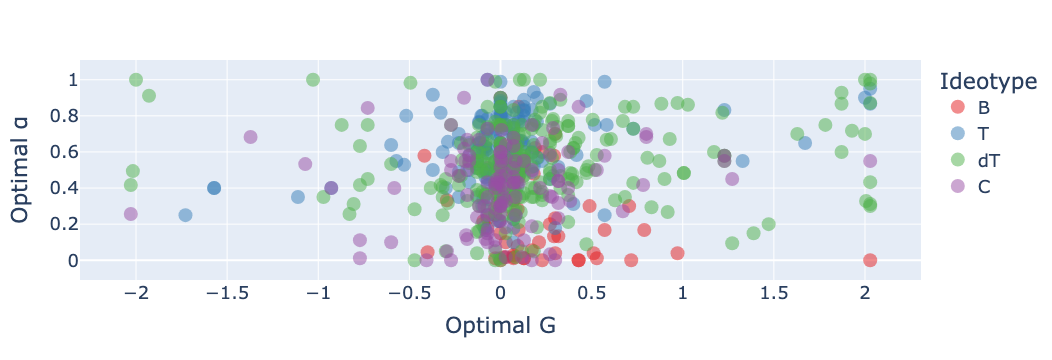

In [100]:
fig = px.scatter(
    ideotypes_df,
    x="optimal G",
    y="optimal alpha",
    color=ideotypes_df["ideotype (T/C/B)"].astype(str),
    hover_name="arbor name",
    opacity=0.5,
    color_discrete_sequence=px.colors.qualitative.Set1,
)

fig.update_traces(marker=dict(size=14))
fig.update_layout(
    font=dict(size=18),
    legend_title_text="Ideotype",
    xaxis_title="Optimal G",
    yaxis_title="Optimal α",
    showlegend=True
)

fig.show()
fig.write_html("docs/Optimal_G_alpha_ideotypes.html")

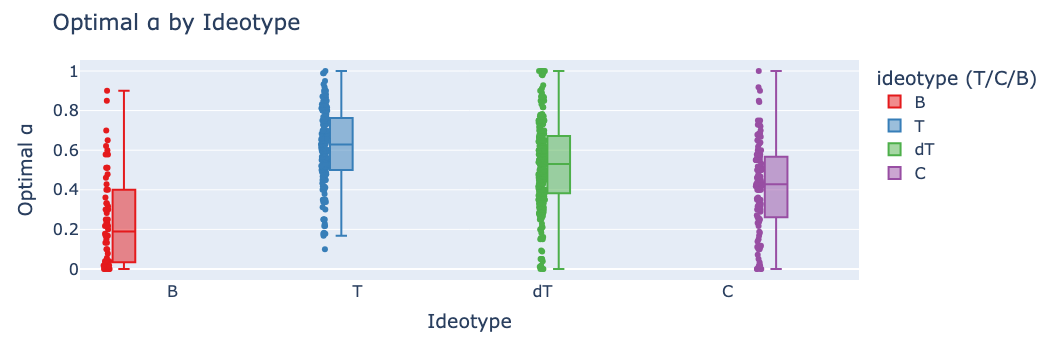

In [112]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    ideotypes_df,
    x="ideotype (T/C/B)",
    y="optimal alpha",
    color="ideotype (T/C/B)",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal α by Ideotype",
    xaxis_title="Ideotype",
    yaxis_title="Optimal α",
    font=dict(size=16),
    boxmode="group"
)

fig.show()

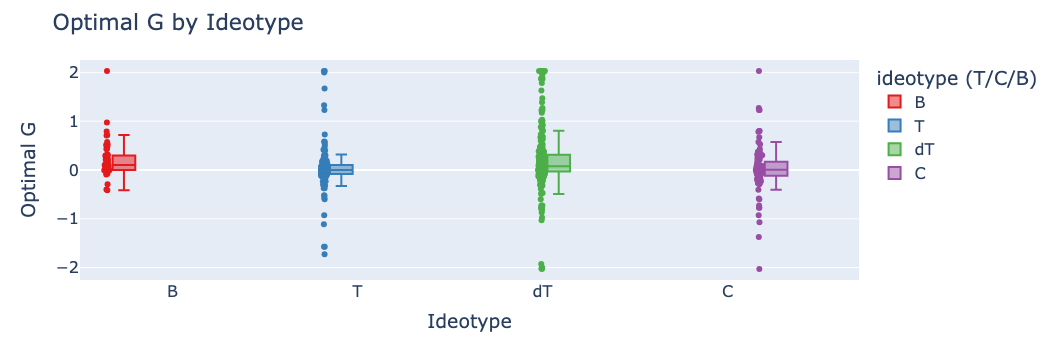

In [113]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    ideotypes_df,
    x="ideotype (T/C/B)",
    y="optimal G",
    color="ideotype (T/C/B)",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal G by Ideotype",
    xaxis_title="Ideotype",
    yaxis_title="Optimal G",
    font=dict(size=16),
    boxmode="group"
)

fig.show()

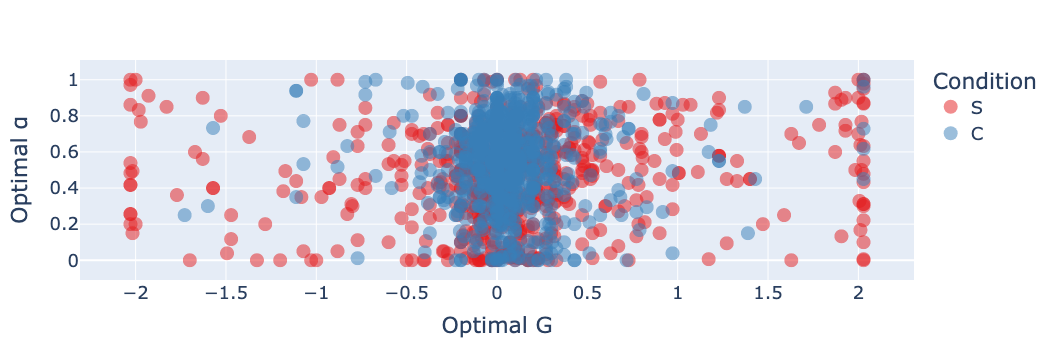

In [74]:
fig = px.scatter(
    arbor_stats_df,
    x="optimal G",
    y="optimal alpha",
    color=arbor_stats_df["condition"].astype(str),
    hover_name="arbor name",
    opacity=0.5,
    color_discrete_sequence=px.colors.qualitative.Set1,
)

fig.update_traces(marker=dict(size=14))
fig.update_layout(
    font=dict(size=18),
    legend_title_text="Condition",
    xaxis_title="Optimal G",
    yaxis_title="Optimal α",
    showlegend=True
)

fig.show()
fig.write_html("docs/Optimal_G_alpha_condition.html")

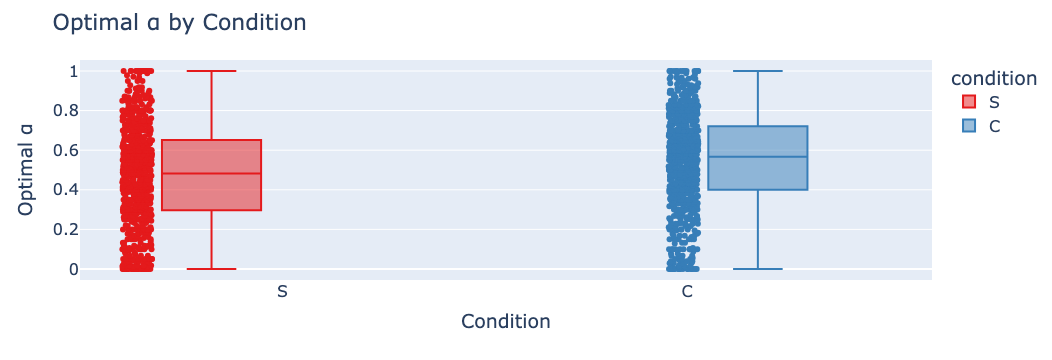

In [115]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    arbor_stats_df,
    x="condition",
    y="optimal alpha",
    color="condition",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal α by Condition",
    xaxis_title="Condition",
    yaxis_title="Optimal α",
    font=dict(size=16),
    boxmode="group"
)

fig.show()

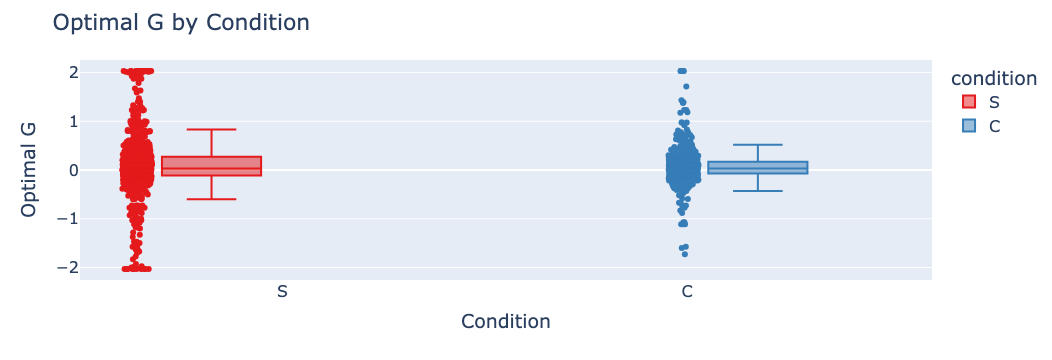

In [116]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    arbor_stats_df,
    x="condition",
    y="optimal G",
    color="condition",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal G by Condition",
    xaxis_title="Condition",
    yaxis_title="Optimal G",
    font=dict(size=16),
    boxmode="group"
)

fig.show()

In [63]:
hormone_df = arbor_stats_df.dropna(subset="hormone")
hormone_df

,arbor name,optimal G,optimal alpha,optimal pt distance,experiment,day,Picture #,genotype,replicate,condition,hormone
9,248_9_S_noiaa_day9,0.1000,1.0000,4.294807,PimpiIAA1,9,46,248,9,S,noiaa
11,LA1511_6_C_locyto_day9,-0.2000,0.5000,0.195330,PimpiCyto,9,26,LA1511,6,C,locyto
38,LA1511_9_C_noaba_day9,0.2000,0.3000,5.330447,PimpiABA,9,164,LA1511,9,C,noaba
42,LA1511_7_S_nocyto_day9,0.1000,0.5000,0.782134,PimpiCyto,9,54,LA1511,7,S,nocyto
43,la1511_2_S_1acc_day9,0.2000,0.4000,0.029065,PimpiACC,9,110,la1511,2,S,1acc
...,...,...,...,...,...,...,...,...,...,...,...
1579,058_3_S_noiaa_day9,-0.3286,0.7327,0.480647,PimpiIAA1,9,100,058,3,S,noiaa
1580,m248_4_C_1acc_day9,0.0000,0.7827,47.824094,PimpiACC,9,145,m248,4,C,1acc
1583,M058_1_S_1aba_day9,1.9060,0.1327,0.375290,PimpiABA,9,50,M058,1,S,1aba
1584,M248_2_C_nocyto_day9,0.0714,0.7613,9.336840,PimpiCyto,9,105,M248,2,C,nocyto


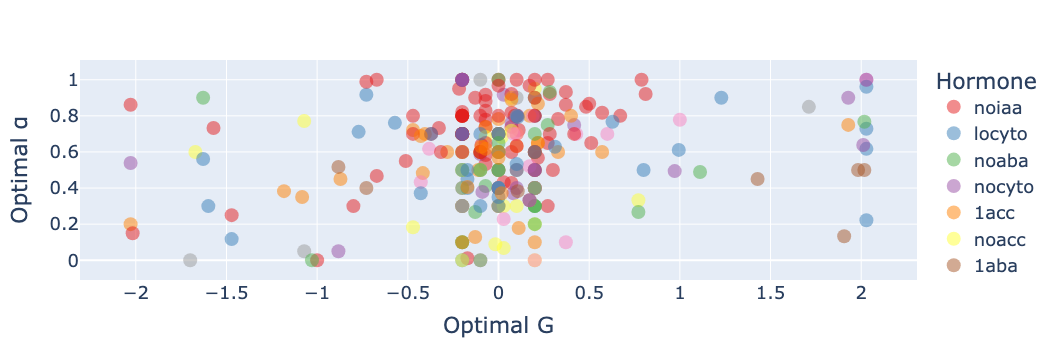

In [75]:
fig = px.scatter(
    hormone_df,
    x="optimal G",
    y="optimal alpha",
    color=hormone_df["hormone"].astype(str),
    hover_name="arbor name",
    opacity=0.5,
    color_discrete_sequence=px.colors.qualitative.Set1,
)

fig.update_traces(marker=dict(size=14))
fig.update_layout(
    font=dict(size=18),
    legend_title_text="Hormone",
    xaxis_title="Optimal G",
    yaxis_title="Optimal α",
    showlegend=True
)

fig.show()
fig.write_html("docs/Optimal_G_alpha_hormone.html")

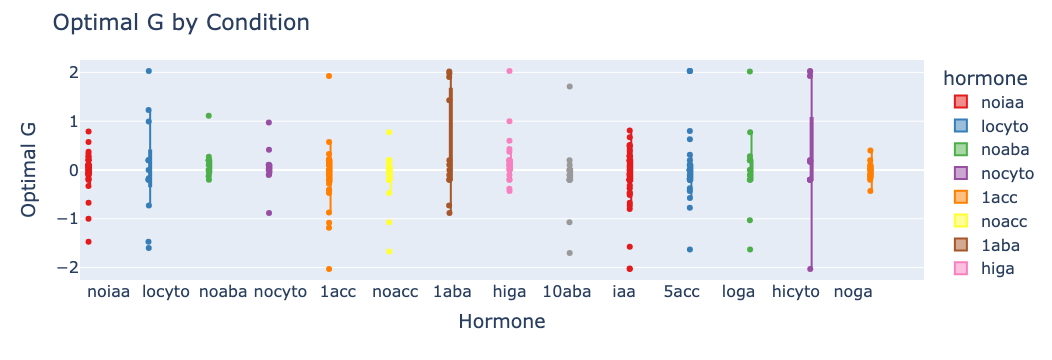

In [117]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    hormone_df,
    x="hormone",
    y="optimal G",
    color="hormone",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal G by Condition",
    xaxis_title="Hormone",
    yaxis_title="Optimal G",
    font=dict(size=16),
    boxmode="group"
)

fig.show()

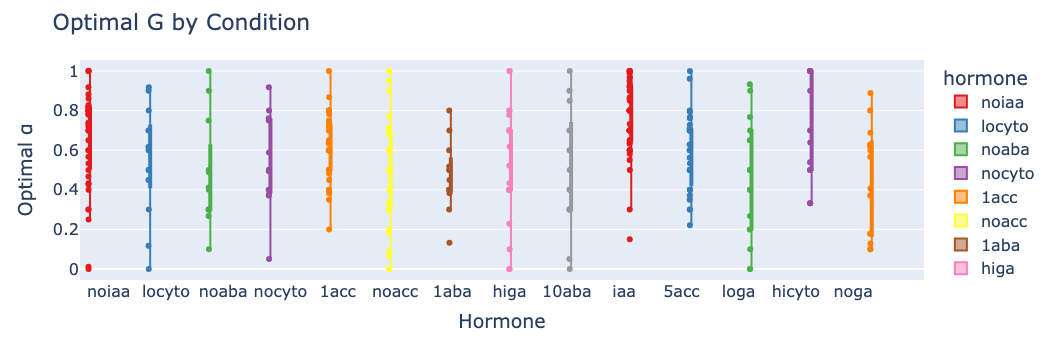

In [118]:
# Base boxplot (like boxen, shows distribution)
fig = px.box(
    hormone_df,
    x="hormone",
    y="optimal alpha",
    color="hormone",                # hue
    points="all",                            # show all points like boxen
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Layout tweaks
fig.update_layout(
    title="Optimal G by Condition",
    xaxis_title="Hormone",
    yaxis_title="Optimal α",
    font=dict(size=16),
    boxmode="group"
)

fig.show()